In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import src.load as load
import src.representations as rep
import nltk
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np

In [3]:
# load development set
tweets, test_data = load.load_data(full = False, preprocessed=False)

In [ ]:
path = 'data/glove.twitter.27B.200d.txt'
glove_pre = rep.glove_pretrained(path)

In [63]:
path2 = 'data/embeddings.txt'
glove_self = rep.glove_pretrained(path2)

In [64]:
y = tweets['label'].values

In [65]:
X_pretrained = rep.map_glove(tweets['body'], glove_pre)
X_selftrained = rep.map_glove(tweets['body'], glove_self)

In [66]:
X_train_pre, X_val_pre, y_train_pre, y_val_pre = train_test_split(X_pretrained, y, test_size=0.2, random_state=0)
X_train_self, X_val_self, y_train_self, y_val_self = train_test_split(X_selftrained, y, test_size=0.2, random_state=0)

In [67]:
def standardize(xtrain, xtest):
    
    means = np.mean(xtrain, axis=0)
    stds = np.std(xtrain, axis=0)
    
    xtrain_std = (xtrain-means)/stds
    xtest_std = (xtest-means)/stds
    
    return xtrain_std, xtest_std

In [68]:
X_train_pre_std, X_val_pre_std = standardize(X_train_pre, X_val_pre)

In [69]:
X_train_self_std, X_val_self_std = standardize(X_train_self, X_val_self)

# SVM

In [87]:
# selftrained
alphas_svm = np.logspace(-5,0,8)

print("%7s | %19s | %17s " % ("C","Validation accuracy","Training accuracy"))
    
for a in alphas_svm: 
    svm_self = SGDClassifier(loss = 'hinge', alpha = a, random_state=0, n_jobs=-1, verbose=False).fit(X_train_self_std, y_train_pre)
    print("%7.5f | %19.4f | %17.4f" % (a, 
                                       svm_self.score(X_val_self_std, y_val_pre), 
                                       svm_self.score(X_train_self_std, y_train_pre)))

      C | Validation accuracy | Training accuracy 
0.00001 |              0.6630 |            0.6678
0.00005 |              0.6806 |            0.6893
0.00027 |              0.6902 |            0.6958
0.00139 |              0.6972 |            0.7030
0.00720 |              0.6986 |            0.7035
0.03728 |              0.6989 |            0.7029
0.19307 |              0.6942 |            0.6977
1.00000 |              0.6789 |            0.6821


In [88]:
# pretrained
alphas_svm = np.logspace(-5,0,8)

print("%7s | %19s | %17s " % ("C","Validation accuracy","Training accuracy"))
    
for a in alphas_svm: 
    svm_pre = SGDClassifier(loss = 'hinge', alpha = a, random_state=0, n_jobs=-1, verbose=False).fit(X_train_pre_std, y_train_pre)
    print("%7.5f | %19.4f | %17.4f" % (a, 
                                       svm_pre.score(X_val_pre_std, y_val_pre), 
                                       svm_pre.score(X_train_pre_std, y_train_pre)))

      C | Validation accuracy | Training accuracy 
0.00001 |              0.7555 |            0.7606
0.00005 |              0.7650 |            0.7683
0.00027 |              0.7785 |            0.7794
0.00139 |              0.7832 |            0.7833
0.00720 |              0.7832 |            0.7854
0.03728 |              0.7809 |            0.7829
0.19307 |              0.7736 |            0.7736
1.00000 |              0.7451 |            0.7482


# LOGREG

In [89]:
# pretrained
alphas = np.logspace(-3.5,-2, 8)

print("%7s | %19s | %17s " % ("Lambda","Validation accuracy","Training accuracy"))
    
for a in alphas: 
    clf_pre = SGDClassifier(loss = 'log', alpha = a, random_state=0, n_jobs=-1, verbose=False).fit(X_train_pre_std, y_train_pre)
    print("%7.5f | %19.4f | %17.4f" % (a, 
                                       clf_pre.score(X_val_pre_std, y_val_pre), 
                                       clf_pre.score(X_train_pre_std, y_train_pre)))

 Lambda | Validation accuracy | Training accuracy 
0.00032 |              0.7785 |            0.7783
0.00052 |              0.7789 |            0.7813
0.00085 |              0.7805 |            0.7821
0.00139 |              0.7802 |            0.7822
0.00228 |              0.7810 |            0.7829
0.00373 |              0.7813 |            0.7828
0.00611 |              0.7801 |            0.7820
0.01000 |              0.7793 |            0.7814


In [91]:
# selftrained
alphas = np.logspace(-5,-1,8)

print("%7s | %19s | %17s " % ("Lambda","Validation accuracy","Training accuracy"))
    
for a in alphas: 
    clf_self = SGDClassifier(loss = 'log', alpha = a, random_state=0, n_jobs=-1, verbose=False).fit(X_train_self_std, y_train_pre)
    print("%7.5f | %19.4f | %17.4f" % (a, 
                                       clf_self.score(X_val_self_std, y_val_pre), 
                                       clf_self.score(X_train_self_std, y_train_pre)))

 Lambda | Validation accuracy | Training accuracy 
0.00001 |              0.6628 |            0.6676
0.00004 |              0.6862 |            0.6900
0.00014 |              0.6841 |            0.6894
0.00052 |              0.6854 |            0.6910
0.00193 |              0.6906 |            0.6956
0.00720 |              0.6916 |            0.6964
0.02683 |              0.6915 |            0.6958
0.10000 |              0.6867 |            0.6905


# RANDOM FORREST

In [92]:
n_estimators = [50, 150, 300, 500, 1000]

In [93]:
# pretrained
train_res_pre = []
val_res_pre = []

print("%7s | %19s | %17s | %9s" % ("N","Validation accuracy","Training accuracy", "Max depth"))

for n in n_estimators:
    rf_pre = RandomForestClassifier(n_estimators=n, 
                                    n_jobs=-1, 
                                    random_state=0,
                                    verbose=False).fit(X_train_pre, y_train_pre)
    print("%7.0f | %19.4f | %17.4f | %9.0f" % (n, 
                                       rf_pre.score(X_val_pre, y_val_pre), 
                                       rf_pre.score(X_train_pre, y_train_pre),
                                       max([x.tree_.max_depth for x in rf_pre.estimators_])))
    
    fpr, tpr, _ = roc_curve(y_train_pre, rf_pre.predict(X_train_pre))
    roc_auc = auc(fpr,tpr)
    train_res_pre.append(roc_auc)
    
    fpr, tpr, _ = roc_curve(y_val_pre, rf_pre.predict(X_val_pre))
    roc_auc = auc(fpr,tpr)
    val_res_pre.append(roc_auc)

      N | Validation accuracy | Training accuracy | Max depth
     50 |              0.7719 |            0.9998 |        51
    150 |              0.7841 |            0.9998 |        52
    300 |              0.7882 |            0.9998 |        52
    500 |              0.7893 |            0.9998 |        52
   1000 |              0.7905 |            0.9998 |        62


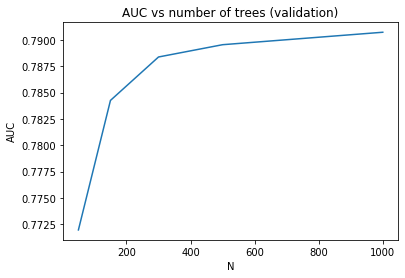

In [94]:
plt.plot(n_estimators, val_res_pre)
plt.ylabel('AUC')
plt.xlabel('N')
plt.title('AUC vs number of trees (validation)')
plt.show()

In [95]:
# tune max_depth
max_depths = np.linspace(10, 100, 10)

print("%9s | %19s | %17s " % ("Max depth","Validation accuracy","Training accuracy"))

for d in max_depths:
    rf_pre = RandomForestClassifier(n_estimators=150, 
                                     max_depth=d,
                                     n_jobs=-1, 
                                     random_state=0,
                                     verbose=False).fit(X_train_pre, y_train_pre)
    print("%9.0f | %19.4f | %17.4f" % (d, 
                                       rf_pre.score(X_val_pre, y_val_pre), 
                                       rf_pre.score(X_train_pre, y_train_pre)))

Max depth | Validation accuracy | Training accuracy 
       10 |              0.7539 |            0.8017
       20 |              0.7834 |            0.9977
       30 |              0.7824 |            0.9998
       40 |              0.7833 |            0.9998
       50 |              0.7839 |            0.9998
       60 |              0.7841 |            0.9998
       70 |              0.7841 |            0.9998
       80 |              0.7841 |            0.9998
       90 |              0.7841 |            0.9998
      100 |              0.7841 |            0.9998


In [96]:
# selftrained

train_res_self = []
val_res_self = []

print("%7s | %19s | %17s | %9s" % ("N","Validation accuracy","Training accuracy", "Max depth"))

for n in n_estimators:
    rf_self = RandomForestClassifier(n_estimators=n, 
                                    n_jobs=-1, 
                                    random_state=0,
                                    verbose=False).fit(X_train_
                                                       self, y_train_self)
    print("%7.0f | %19.4f | %17.4f | %9.0f" % (n, 
                                                rf_self.score(X_val_self, y_val_self), 
                                                rf_self.score(X_train_self, y_train_self),
                                                max([x.tree_.max_depth for x in rf_self.estimators_])))
    
    fpr, tpr, thres = roc_curve(y_train_self, rf_self.predict(X_train_self))
    roc_auc = auc(fpr,tpr)
    train_res_self.append(roc_auc)
    
    fpr, tpr, thres = roc_curve(y_val_self, rf_self.predict(X_val_self))
    roc_auc = auc(fpr,tpr)
    val_res_self.append(roc_auc)

      N | Validation accuracy | Training accuracy | Max depth
     50 |              0.7084 |            0.9967 |        53
    150 |              0.7213 |            0.9967 |        57
    300 |              0.7260 |            0.9968 |        61
    500 |              0.7273 |            0.9967 |        61
   1000 |              0.7296 |            0.9967 |        61


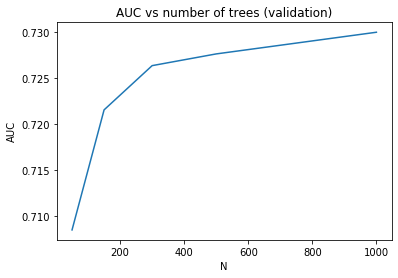

In [97]:
plt.plot(n_estimators, val_res_self)
plt.ylabel('AUC')
plt.xlabel('N')
plt.title('AUC vs number of trees (validation)')
plt.show()

In [98]:
# tune max_depth
max_depths = np.linspace(10, 100, 10)

print("%9s | %19s | %17s " % ("Max depth","Validation accuracy","Training accuracy"))

for d in max_depths:
    rf_self = RandomForestClassifier(n_estimators=300, 
                                     max_depth=d,
                                     n_jobs=-1, 
                                     random_state=0,
                                     verbose=False).fit(X_train_self, y_train_self)
    print("%9.0f | %19.4f | %17.4f" % (d, 
                                       rf_self.score(X_val_self, y_val_self), 
                                       rf_self.score(X_train_self, y_train_self)))

Max depth | Validation accuracy | Training accuracy 
       10 |              0.6987 |            0.7731
       20 |              0.7247 |            0.9950
       30 |              0.7272 |            0.9965
       40 |              0.7248 |            0.9967
       50 |              0.7245 |            0.9968
       60 |              0.7258 |            0.9968
       70 |              0.7260 |            0.9968
       80 |              0.7260 |            0.9968
       90 |              0.7260 |            0.9968
      100 |              0.7260 |            0.9968


In [6]:
# load full dataset
tweets_full_raw, test_data_raw = load.load_data(full = True, preprocessed = False)
bodies_full = tweets_full_raw['body']
y_full = tweets_full_raw['label'].values

# load test data
test_bodies = test_data_raw['body']

In [133]:
# map tokens to embeddings
X_full_pre = rep.map_glove(bodies_full, glove_pre)
X_full_self = rep.map_glove(bodies_full, glove_self)

In [134]:
X_test_pre = rep.map_glove(test_bodies, glove_pre)
X_test_self = rep.map_glove(test_bodies, glove_self)

In [135]:
X_full_self.shape

(2500000, 200)

In [136]:
# standardize
X_full_pre_std, X_test_pre_std = standardize(X_full_pre, X_test_pre)

In [137]:
X_full_self_std, X_test_self_std = standardize(X_full_self, X_test_self)

# SVM

In [139]:
# 0.694
# selftrained
alphas_svm = np.logspace(-5,0,8)

svm_self = SGDClassifier(loss = 'hinge', 
                            random_state=0, 
                            alpha = alphas[5], 
                            n_jobs=-1).fit(X_full_self_std, y_full)
y_pred = svm_self.predict(X_test_self_std)

In [150]:
# 0.779
# pretrained
alphas_svm = np.logspace(-5,0,8)


svm_pre = SGDClassifier(loss = 'hinge', 
                            random_state=0, 
                            alpha = alphas[4], 
                            n_jobs=-1).fit(X_full_pre_std, y_full)
y_pred2 = svm_pre.predict(X_test_pre_std)

# LOGREG

In [151]:
# 0.774
alphas = np.logspace(-3.5,-2, 8)

logreg_pre = SGDClassifier(loss = 'log', 
                           alpha = alphas[5], 
                           random_state=0, 
                           n_jobs=-1).fit(X_full_pre_std, y_full)
y_pred3 = logreg_pre.predict(X_test_pre_std)

In [154]:
# 0.687
alphas = np.logspace(-5,-1,8)

logreg_self = SGDClassifier(loss = 'log', 
                            random_state=0, 
                            alpha = alphas[5], 
                            n_jobs=-1).fit(X_full_self_std, y_full)
y_pred4 = logreg_self.predict(X_test_self_std)

# RANDOM FOREST

In [155]:
# 0.777
rf_pre = RandomForestClassifier(n_estimators=150, 
                                     max_depth=20,
                                     n_jobs=-1, 
                                     random_state=0).fit(X_full_pre, y_full)
y_pred5 = rf_pre.predict(X_test_pre)

In [156]:
# 0.729
rf_self = RandomForestClassifier(n_estimators=300, 
                                     max_depth=30,
                                     n_jobs=-1, 
                                     random_state=0).fit(X_full_self, y_full)
y_pred6 = rf_self.predict(X_test_self)

In [157]:
create_csv_submission(test_data_raw.index + 1, y_pred, './data/submissions/svm-selftrained-glove.txt')
create_csv_submission(test_data_raw.index + 1, y_pred2, './data/submissions/svm-pretrained-glove.txt')
create_csv_submission(test_data_raw.index + 1, y_pred3, './data/submissions/logreg-pretrained-glove.txt')
create_csv_submission(test_data_raw.index + 1, y_pred4, './data/submissions/logreg-selftrained-glove.txt')
create_csv_submission(test_data_raw.index + 1, y_pred5, './data/submissions/rf-pretrained-glove.txt')
create_csv_submission(test_data_raw.index + 1, y_pred6, './data/submissions/rf-selftrained-glove.txt')